Spam message Classification Problem

In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
# Check imbalance 
df['label'].value_counts()/(len(df))*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [7]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [8]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [9]:
# Oversampling: ham=4825, spam=4825, total=9650
# Undersampling: ham=747, spam=747, total=1494

In [10]:
ham.shape[0], ham.shape[1]

(4825, 4)

In [11]:
# Undersampling
ham=ham.sample(spam.shape[0],replace=True)
spam.shape,ham.shape

((747, 4), (747, 4))

Data is balanced now. Now combine both dataframes.

In [12]:
data=ham.append(spam,ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Ok i msg u b4 i leave my house.,31,1
1,ham,I'm working technical support :)voice process.,46,4
2,ham,Finished class where are you.,29,1
3,ham,Hope youre not having too much fun without me...,75,2
4,ham,I'm ok. Will do my part tomorrow,32,2


(array([ 23.,   0.,   0.,  26.,   0.,   0.,   0.,  73.,   0.,   0.,   0.,
        115.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,  67.,   0.,   0.,
          0.,  86.,   0.,   0.,  74.,   0.,   0.,   0.,  66.,   0.,   0.,
          0.,  49.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,  22.,   0.,   0.,   0.,  14.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

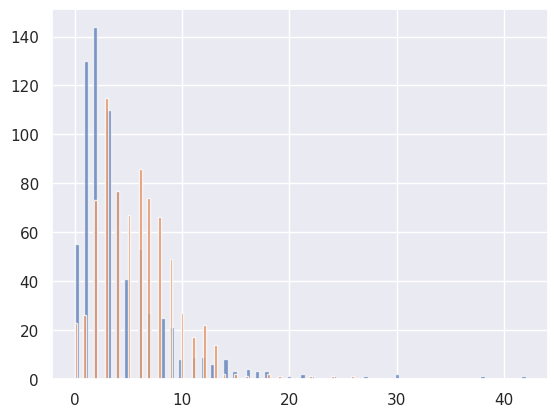

In [13]:
# Visualization by using ham and spam

plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.8)

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

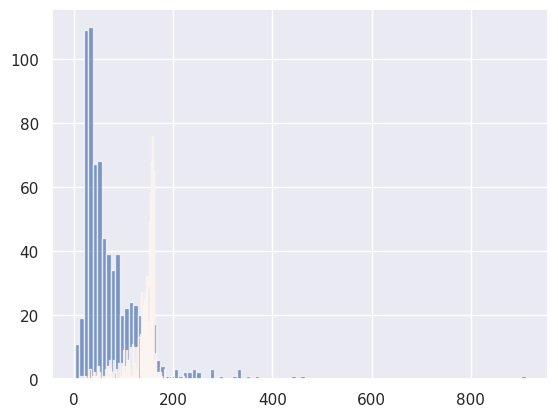

In [14]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.8)

In [15]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [16]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=101)

In [17]:
1494*0.3

448.2

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1045,) (449,) (1045,) (449,)


Building Classification Model

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier

# Pipeline package to merge nlp and machine learning and get the output
from sklearn.pipeline import Pipeline

In [20]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),
                     ('classifier',RandomForestClassifier())])

In [21]:
RandomForestClassifier()

RandomForestClassifier()

In [22]:
classifier

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [23]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [24]:
y_pred_train=classifier.predict(x_train)
y_pred_test=classifier.predict(x_test)

In [25]:
y_pred_train

array(['spam', 'spam', 'spam', ..., 'ham', 'spam', 'spam'], dtype=object)

In [26]:
y_pred_test

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ha

Evaluation metrics

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
confusion_matrix(y_test,y_pred_test)

array([[224,   2],
       [ 21, 202]])

In [29]:
print(classification_report(y_train,y_pred_train))
print('....................')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

....................
              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       226
        spam       0.99      0.91      0.95       223

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [30]:
print(accuracy_score(y_train,y_pred_train))
print('....................')
print(accuracy_score(y_test,y_pred_test))

1.0
....................
0.9487750556792873


SOTA- word2vec,BERT

Check model performance

In [31]:
test1=['Hello, Hope you are doing well.']
test2=['Congratulations, You won a lottery ticket worth $100 Million! TO claim call @1111']


In [32]:
print(classifier.predict(test1))
print(classifier.predict(test2))

['ham']
['spam']


Naive Bayes Algorithm

In [33]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [34]:
'''
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]

for i in range(0,len(data)):
    review=re.sub('[^a-zA-Z]', ' ',data['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
'''

"\nimport re\nimport nltk\nnltk.download('stopwords')\nfrom nltk.corpus import stopwords\nfrom nltk.stem.porter import PorterStemmer\nps=PorterStemmer()\ncorpus=[]\n\nfor i in range(0,len(data)):\n    review=re.sub('[^a-zA-Z]', ' ',data['message'][i])\n    review=review.lower()\n    review=review.split()\n    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]\n    review=' '.join(review)\n    corpus.append(review)\n"

In [35]:
#corpus

In [36]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf=TfidfVectorizer()
#x=tfidf.fit_transform(corpus).toarray()

In [37]:
#y=pd.get_dummies(data['label'])
#y=y.iloc[:,1].values

In [38]:
# Split the data into train and test

#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.naive_bayes import MultinomialNB
#spam_detect_model=MultinomialNB().fit(x_train,y_train)
#y_pred_train_nb=spam_detect_model.predict(x_train)
#y_pred_test_nb=spam_detect_model.predict(x_test)

In [40]:
#print(accuracy_score(y_train,y_pred_train_nb))
#print('....................')
#print(accuracy_score(y_test,y_pred_test_nb))

In [41]:
test1=['Hello, Hope you are doing well.']
test2=['Congratulations, You won a lottery ticket worth $100 Million! TO claim call @1111']

In [42]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
test1=tfidf.fit_transform(test1).toarray()
test2=tfidf.fit_transform(test2).toarray()

print(spam_detect_model.predict(test1))
print(spam_detect_model.predict(test2))
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\ntfidf=TfidfVectorizer()\ntest1=tfidf.fit_transform(test1).toarray()\ntest2=tfidf.fit_transform(test2).toarray()\n\nprint(spam_detect_model.predict(test1))\nprint(spam_detect_model.predict(test2))\n'

In [43]:
classifier2=Pipeline([('tfidf',TfidfVectorizer()),
                     ('classifier',MultinomialNB())])

In [44]:
classifier2.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [45]:
print(classifier.predict(test1))
print(classifier.predict(test2))

['ham']
['spam']
